# Loan Data Exploration

#### by Brin Xu

## Investigation Overview

- In this analysis, I am interested in figuring out what features are best for predicting the Loan outcome in the dataset. 

## Dataset Overview

- I used loan data from Prosper to conduct this analysis. The data set has 113,937 loans with 81 variables on each loan status, borrowers' income, and many others. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.sample(10)

ListingKey  ListingNumber            ListingCreationDate  \
3168    04F035971862075809C9A39        1099926  2013-12-20 08:15:10.757000000   
87559   DDC4357784499950858D4B1         767766  2013-05-04 08:43:53.970000000   
15489   55DE3560426922005BA64DC         651782  2012-10-09 18:56:15.523000000   
113080  CDDF3603519895919607A4A        1181827  2014-02-24 15:16:00.277000000   
47651   524D3602077969144CEDA61        1184774  2014-02-08 19:21:38.767000000   
75608   C7D1356118216716370115B         658134  2012-10-22 11:08:55.307000000   
77143   E97435613400870612AD134         658434  2012-10-22 15:41:00.983000000   
70785   F922358328165583974AF00         821157  2013-06-25 16:22:05.703000000   
106271  C0E53416300239836BBF695         297026  2008-03-21 19:27:19.627000000   
73137   0B893587807498875F4F261         884139  2013-08-30 14:05:05.930000000   

       CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
3168           NaN    60    Current                  NaN      0.22140   
87559          NaN    36    Current                  NaN      0.27285   
15489          NaN    60    Current                  NaN      0.27462   
113080         NaN    60    Current                  NaN      0.22780   
47651          NaN    36    Current                  NaN      0.13836   
75608          NaN    36  Completed  2013-01-11 00:00:00      0.35797   
77143          NaN    36    Current                  NaN      0.34045   
70785          NaN    36    Current                  NaN      0.30285   
106271           A    36  Defaulted  2009-03-23 00:00:00      0.12201   
73137          NaN    60    Current                  NaN      0.24589   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
3168          0.1970       0.1870  ...          -19.31                0.0   
87559         0.2346       0.2246  ...          -27.82                0.0   
15489         0.2489       0.2389  ...         -186.31                0.0   
113080        0.2030       0.1930  ...            0.00                0.0   
47651         0.1099       0.0999  ...            0.00                0.0   
75608         0.3177       0.3077  ...           -0.69                0.0   
77143         0.3006       0.2906  ...          -20.40                0.0   
70785         0.2639       0.2539  ...          -13.88                0.0   
106271        0.1080       0.0980  ...          -28.54                0.0   
73137         0.2209       0.2109  ...          -16.45                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
3168                     0.00                 0.00   
87559                    0.00                 0.00   
15489                    0.00                 0.00   
113080                   0.00                 0.00   
47651                    0.00                 0.00   
75608                    0.00                 0.00   
77143                    0.00                 0.00   
70785                    0.00                 0.00   
106271                5213.44              5213.44   
73137                    0.00                 0.00   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
3168                               0.0            1.0                0   
87559                              0.0            1.0                0   
15489                              0.0            1.0                0   
113080                             0.0            1.0                0   
47651                              0.0            1.0                0   
75608                              0.0            1.0                0   
77143                              0.0            1.0                0   
70785                              0.0            1.0                0   
106271                             0.0            1.0                1   
73137                              0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Inves

In [3]:
# summarize the data and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# Check missing values
pd.set_option('display.max_rows', None)
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [5]:
# subsetting the data based on my analysis interest 
cols = ['CreditGrade',
        'Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [6]:
# define sub dataset including my interest variables
df_sub = df[cols]

In [7]:
# check the data
df_sub.describe()

Term  EstimatedEffectiveYield    BorrowerAPR   BorrowerRate  \
count  113937.000000             84853.000000  113912.000000  113937.000000   
mean       40.830248                 0.168661       0.218828       0.192764   
std        10.436212                 0.068467       0.080364       0.074818   
min        12.000000                -0.182700       0.006530       0.000000   
25%        36.000000                 0.115670       0.156290       0.134000   
50%        36.000000                 0.161500       0.209760       0.184000   
75%        36.000000                 0.224300       0.283810       0.250000   
max        60.000000                 0.319900       0.512290       0.497500   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  StatedMonthlyIncome  MonthlyLoanPayment  \
count             106312.000000         1.139370e+05       113937.000000   
mean                  96.071582         5.608026e+03          272.475783   
std                   94.480605         7.478497e+03          192.697812   
min                    0.000000         0.000000e+00            0.000000   
25%                   26.000000         3.200333e+03          131.620000   
50%                   67.000000         4.666667e+03          217.740000   
75%                  137.000000         6.825000e+03          371.580000   
max                  755.000000         1.750003e+06         2251.510000   

       Recommendations  DebtToIncomeRatio  LoanOriginalAmount  PercentFunded  \
count    113937.000000      105383.000000        113937.00000  113937.000000   
mean          0.048027           0.275947          8337.01385       0.998584   
std           0.332353           0.551759          6245.80058       0.017919   
min           0.000000           0.000000          1000.00000       0.700000   
25%           0.000000           0.140000          4000.00000       1.000000   
50%           0.000000           0.220000          6500.00000       1.000000   
75%           0.000000           0.320000         12000.00000       1.000000   
max          39.000000          10.010000         35000.00000       1.012500   

           Investors  
count  113937.000000  
mean       80.475228  
std       103.239020  
min         1.000000  
25%         2.000000  
50%        44.000000  
75%       115.000000  
max      1189.000000

In [8]:
# check column name, types, count
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   EstimatedEffectiveYield    84853 non-null   float64
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ProsperRating (numeric)    84853 non-null   float64
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

## Distribution of Key Variables

- Here are the distributions of the loan amount, borrower APR, borrower's employment status, and homeownership status.

Text(0.5, 1.0, 'Loan Status of all Borrowers')

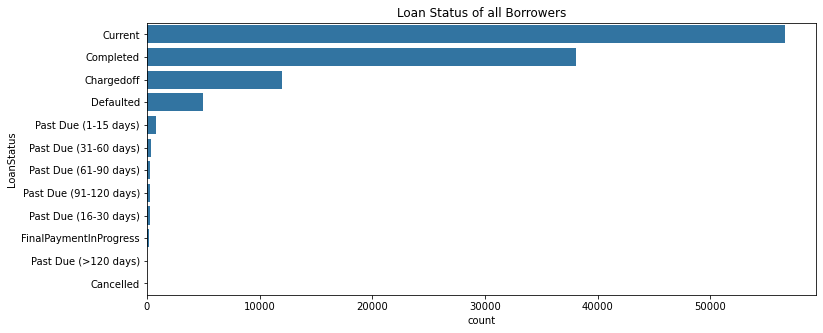

In [9]:
# look at the distribution of loan status
plt.figure(figsize = [12, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, y = 'LoanStatus', color = base_color,
             order = df_sub['LoanStatus'].value_counts().index)
plt.title("Loan Status of all Borrowers")

In [10]:
# Converting Listing Category values from numeric to appropriate labels

df['ListingCategory (numeric)'] = df_sub['ListingCategory (numeric)'].replace({
0: 'Not Available',
1: 'Debt Consolidation',
2: 'Home Improvement',
3: 'Business',
4: 'Personal Loan',
5: 'Student Use',
6: 'Auto',
7: 'Other',
8: 'Baby&Adoption',
9: 'Boat',
10: 'Cosmetic Procedure',
11: 'Engagement Ring',
12: 'Green Loans',
13: 'Household Expenses',
14: 'Large Purchases',
15: 'Medical/Dental',
16: 'Motorcycle',
17: 'RV',
18: 'Taxes',
19: 'Vacation',
20: 'Wedding Loans'})

Text(0.5, 1.0, 'Listing Categories')

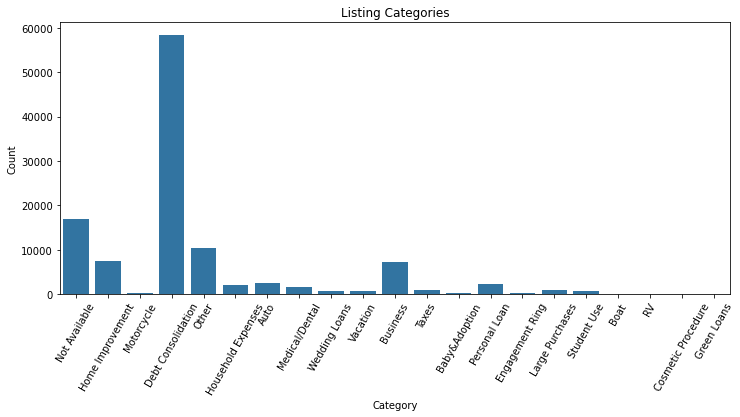

In [11]:
# Look at the distribution of listing category
plt.figure(figsize = [12, 5]) 
sb.countplot(data = df, x = 'ListingCategory (numeric)', color = base_color)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.title('Listing Categories')

Note: Most borrowers are either full-time or part-time employed 

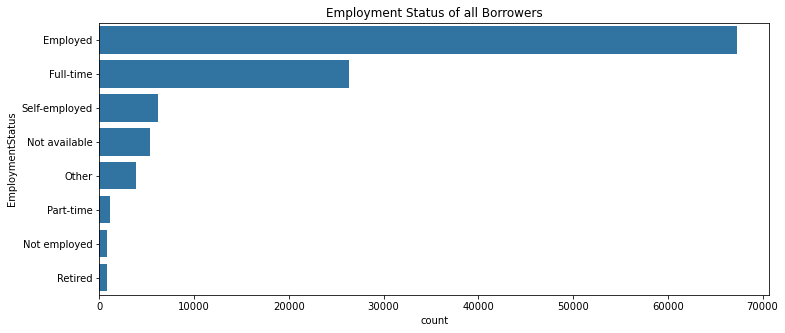

In [12]:
# look at the distribution of employ status
plt.figure(figsize = [12, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, y = 'EmploymentStatus', color = base_color,
             order = df_sub['EmploymentStatus'].value_counts().index)
plt.title("Employment Status of all Borrowers")
print("Note: Most borrowers are either full-time or part-time employed", end = ' ');

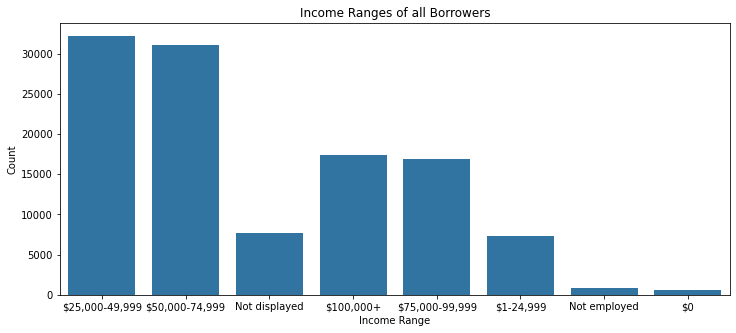

In [13]:
# look at the distribution of income range
plt.figure(figsize = [12, 5]) 
df_sub = df_sub[df_sub['IncomeRange'].isnull() == False]
sb.countplot(data = df_sub, x = 'IncomeRange', color = base_color)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Ranges of all Borrowers');

Note: About half of the borrowers are home owners. 

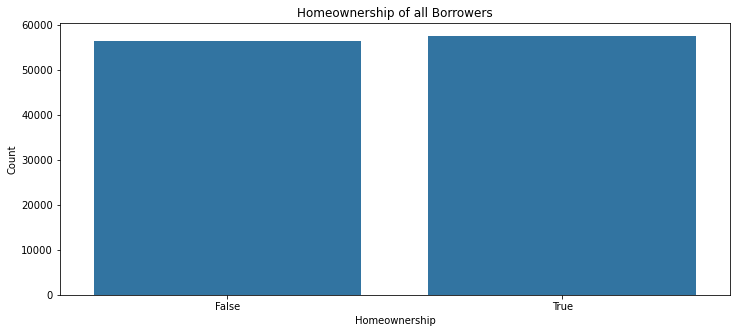

In [14]:
# look at the distribution of homeownership
plt.figure(figsize = [12, 5]) 
df_sub = df_sub[df_sub['IsBorrowerHomeowner'].isnull() == False]
sb.countplot(data = df_sub, x = 'IsBorrowerHomeowner', color = base_color)
plt.xlabel('Homeownership')
plt.ylabel('Count')
plt.title('Homeownership of all Borrowers')
print("Note: About half of the borrowers are home owners.", end = ' ');

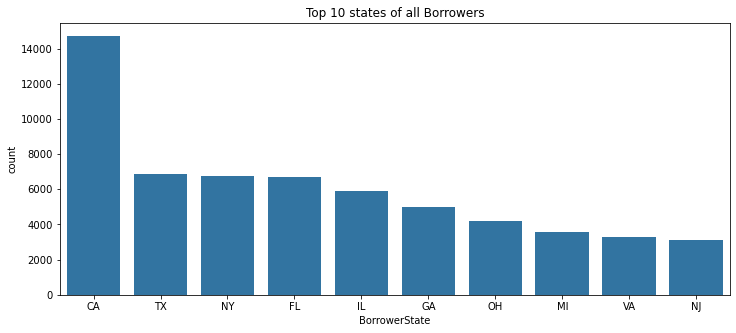

In [15]:
# look at the distribution of Borrower location
plt.figure(figsize = [12, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, x = 'BorrowerState', color = base_color,
             order = df_sub['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

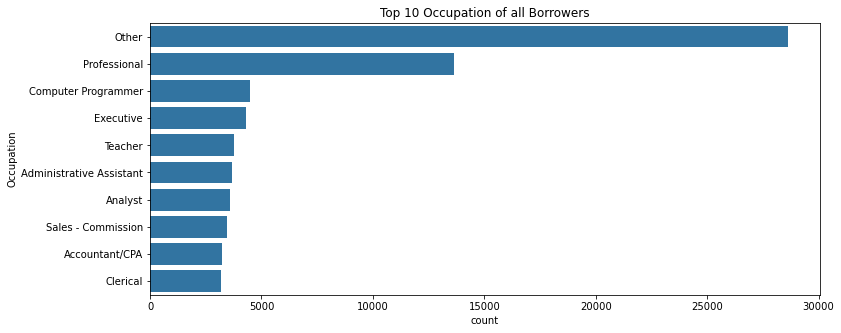

In [16]:
#look at the distribution of Borrower Occupation
plt.figure(figsize = [12, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, y = 'Occupation', color = base_color,
             order = df_sub['Occupation'].value_counts().head(10).index );
plt.title("Top 10 Occupation of all Borrowers");

The loan amount appears to be right-skewed. After log transforming, it becomes a normal distribution. 

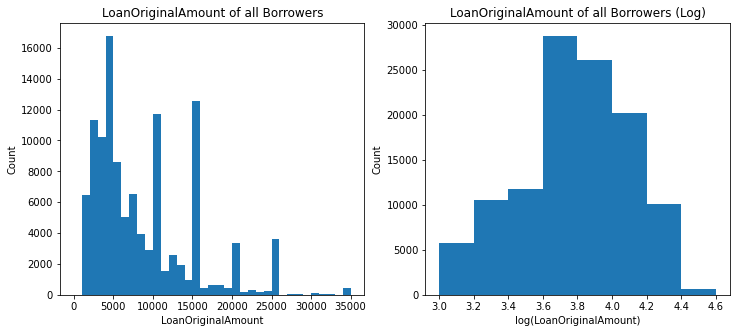

In [17]:
# Look at the distribution of the Original Loan Amounts
plt.figure(figsize = [12, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_sub['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df_sub['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)")
print("The loan amount appears to be right-skewed. After log transforming, it becomes a normal distribution.", end = ' ');

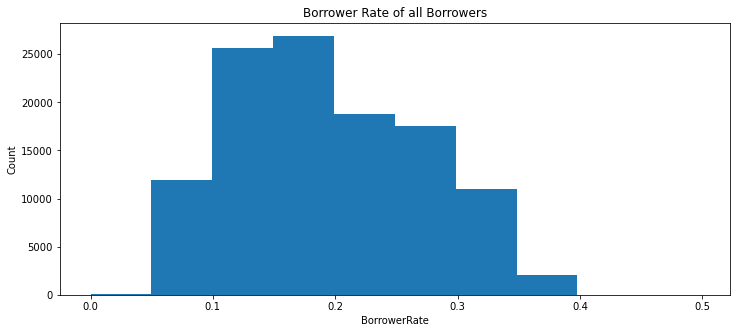

In [18]:
# Look at the distribution of borrower rate
plt.figure(figsize = [12, 5]) 
plt.hist(data = df_sub, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("Borrower Rate of all Borrowers");

Note: Borrower's APR and borrower rate both appear to be a normal distribution. 

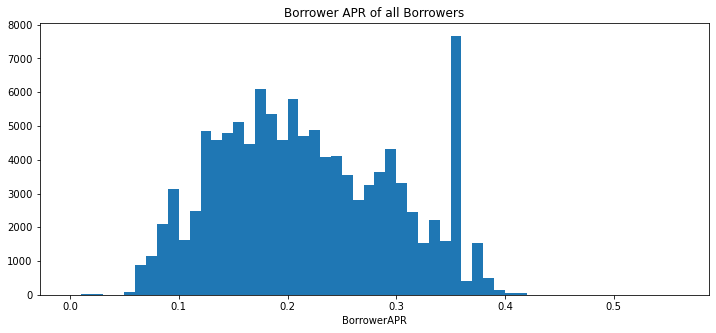

In [19]:
# Look at the distribution of borrowers'APR

plt.figure(figsize = [12, 5]) 
bins = np.arange(0, df_sub.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.title("Borrower APR of all Borrowers")
print("Note: Borrower's APR and borrower rate both appear to be a normal distribution.", end = ' ');

### Insight from Variable Distributions

- I mainly pay attention to two loan outcome variables, loan amount, and borrower APR. For loan amount, its distribution is a right-skewed with multiple peaks observed at 4000 USD, 10000 USD, and 15000 USD. I made log transform and after that, its distribution appears to be normal. For borrower APR, it appears to be a normal distribution.

- I plotted features that are commonly considered to have impacts on loan outcomes. They include borrowers' employment status, income range, whether a homeowner and other characteristics. Most of the variables have expected distributions.

## Relationship among Key Variables - Bivariate Approach

- I will explore relationships among numeric variables, categorical variables, as well as numeric and categorical variables. 

In [20]:
# define variables based on their types
numeric_vars = ['BorrowerAPR','BorrowerRate','LoanOriginalAmount']

categoric_vars = ['LoanStatus', 'ListingCategory (numeric)', 'EmploymentStatus',
                  'IncomeRange', 'Occupation', 'BorrowerState','IsBorrowerHomeowner']

Note: Borrower's APR and borrower rate are highly correlated. Both are negatively associated with a loan amount. Given the similarity of the two variables, I would choose one for further analysis. 

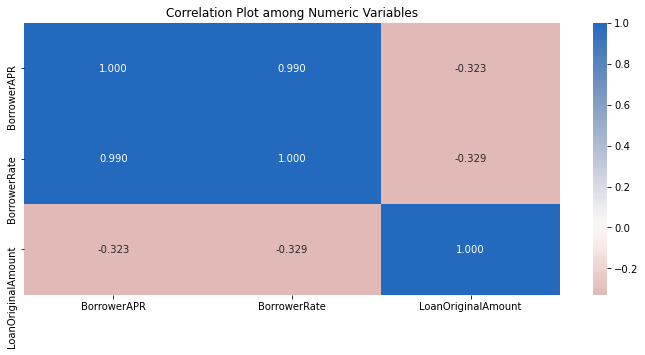

In [21]:
# correlation plot 
plt.figure(figsize = [12, 5])
sb.heatmap(df_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot among Numeric Variables')
print("Note: Borrower's APR and borrower rate are highly correlated. Both are negatively associated with a loan amount. Given the similarity of the two variables, I would choose one for further analysis.", end = ' ');

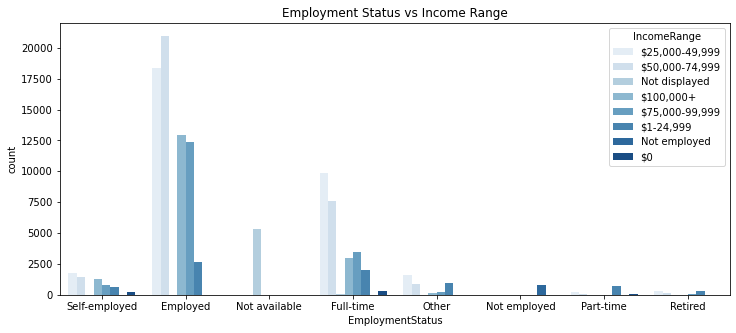

In [22]:
# Employment Status vs. Income Range
plt.figure(figsize = [12, 5])
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.title('Employment Status vs Income Range');

Note: Most borrowers get less than 5K, regardless of their employment status. On the other hand, those who get employed or self-employed seem to be able to secure loans larger than 10K. 

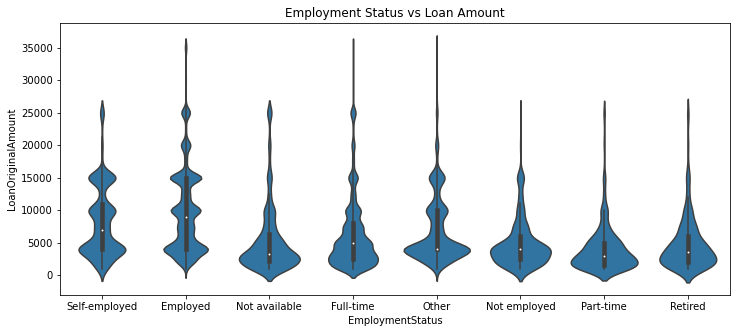

In [23]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
ax1 = sb.violinplot(data = df_sub, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color)
plt.title('Employment Status vs Loan Amount')
print("Note: Most borrowers get less than 5K, regardless of their employment status. On the other hand, those who get employed or self-employed seem to be able to secure loans larger than 10K.", end = ' ');

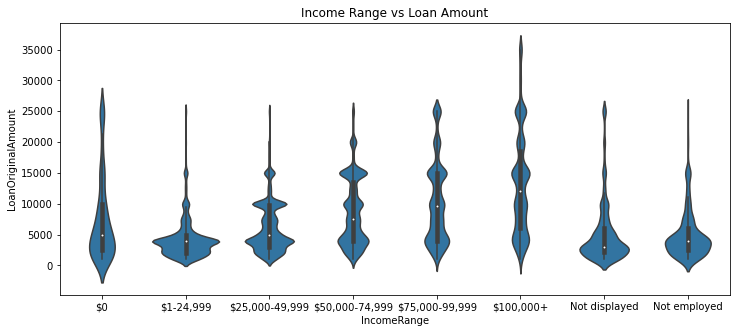

In [24]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

income_range = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
ax1 = sb.violinplot(data = df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color, order = income_range)
plt.title('Income Range vs Loan Amount');

Note: Homeowners are clearly more likely to secure a higher amount of loan. 

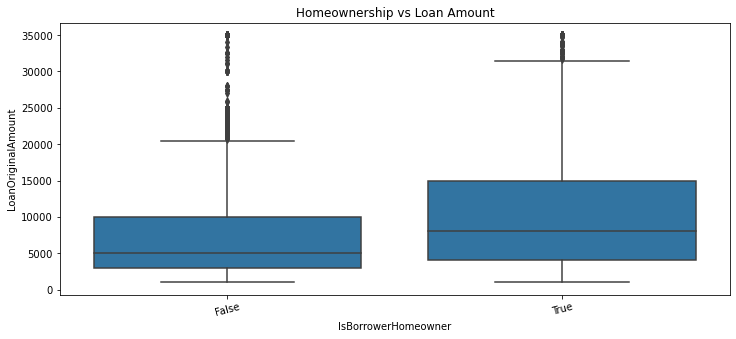

In [25]:
# plot matrix of numeric features against categorical features.
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
ax1 = sb.boxplot(data = df_sub, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Homeownership vs Loan Amount')
print("Note: Homeowners are clearly more likely to secure a higher amount of loan.", end = ' ');

### Insight from Bivariate Analysis 

- From exploring relationships among numeric variables, I found borrower APR appears to be negatively associated with loan amounts. That is, the higher the loan amount, the lower borrower APR, and vice versa.

- From income range and employment status graph, I found that majority of the borrower is employed, and these employed have the highest income. These two variables appear to be highly correlated.

- From the relationship between employment status and loan amounts, I found most borrowers get less than 5K, regardless of their employment status. On the other hand, those who get employed or self-employed seem to be able to secure loans larger than 10K.

- I adapted the same plot to check the relationship between income rage and loan amounts. It appears that most borrowers get loan amounts less than 5K.

- Homeownership appears to be a good differentiator; those with a home are clearly more likely to secure a higher amount of loan.

- These plots are largely fitted into my expectation. However, it appears that some lower-income or unemployed borrowers can still get loans. I suspect those borrowers might have to pay higher interest rates leading to higher borrower APR. Thus, further, investigating how loan status varies across employment status would be interesting.

- These plots also inform me that income range and employment status deliver similar information. They are also potentially highly correlated. I plan to keep only employment status in the further analysis.

## Relationship among Key Variables - Multivariate Approach 

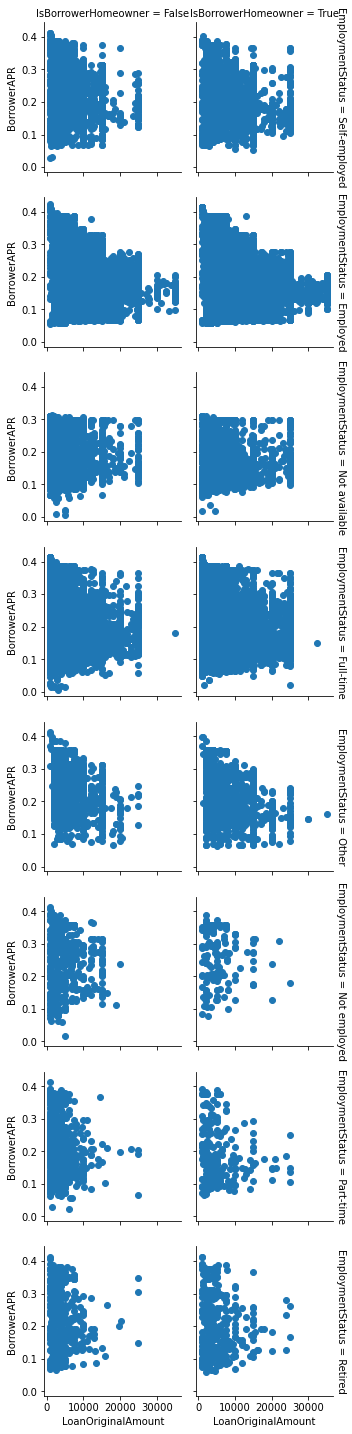

In [26]:
# plot matrix:
g = sb.FacetGrid(data = df_sub, col = 'IsBorrowerHomeowner', row = 'EmploymentStatus', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');

These four variables seem related but do not yield a clear pattern. I will further investigate later.

Note: For those with a home, borrows' APR is the lowest for full-time employed. However, for those without a home, it is one of the highest for full-time employed. 

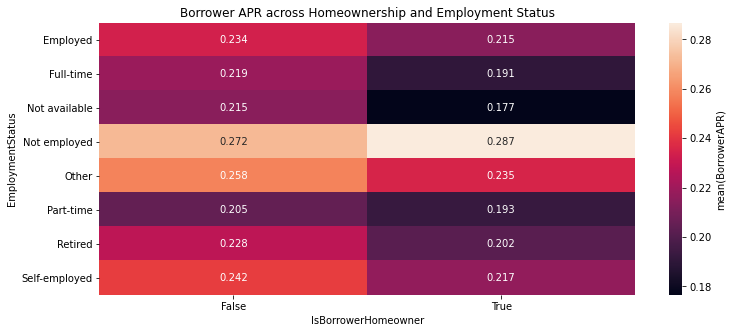

In [27]:
# correlation plot of homeownership, employment status, and borrower APR
plt.figure(figsize = [12, 5])
cat_means = df_sub.groupby(['IsBorrowerHomeowner', 'EmploymentStatus']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner',
                            values = 'BorrowerAPR_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR across Homeownership and Employment Status')
print("Note: For those with a home, borrows' APR is the lowest for full-time employed. However, for those without a home, it is one of the highest for full-time employed.", end = ' ');

Note: For those with a home, the loan amount is the highest for full-time employed. However, for those who are without a home, the loan amount is still the highest. 

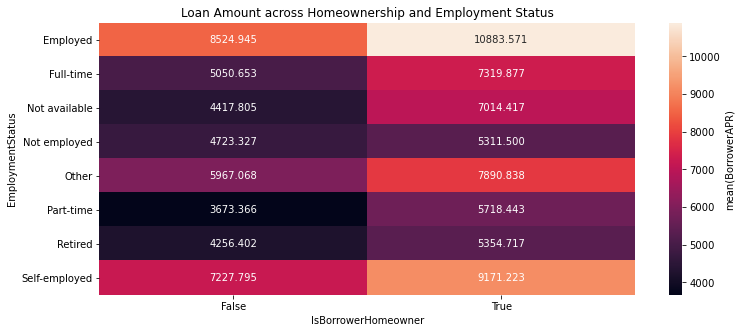

In [28]:
# correlation plot OF homeownership, employment status, and loan amount
plt.figure(figsize = [12, 5])
cat_means = df_sub.groupby(['IsBorrowerHomeowner', 'EmploymentStatus']).mean()['LoanOriginalAmount']
cat_means = cat_means.reset_index(name = 'LoanOriginalAmount_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner',
                            values = 'LoanOriginalAmount_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Loan Amount across Homeownership and Employment Status')
print("Note: For those with a home, the loan amount is the highest for full-time employed. However, for those who are without a home, the loan amount is still the highest.", end = ' ');

Note: The scatterplot shows that borrowers with homes, while full-time employed, are most likely to secure higher amounts of funding. 

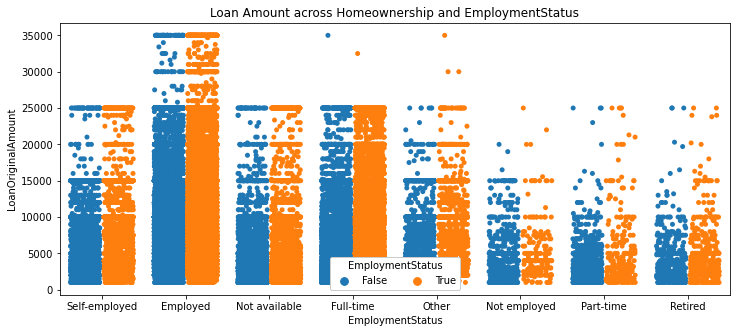

In [29]:
# plot to check how loan amount across homeownership and employment status
plt.figure(figsize = [12, 5])
ax = sb.stripplot(data = df_sub, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
                 jitter=0.35, dodge=True)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'EmploymentStatus')
plt.title('Loan Amount across Homeownership and EmploymentStatus')
print("Note: The scatterplot shows that borrowers with homes, while full-time employed, are most likely to secure higher amounts of funding.", end = ' ');

### Insight from Multivariate Analysis 

- I extended my investigation of loan status against borrowers' characteristics by looking at the impact of the three categorical quality features. 

- First, I investigated the relationship among borrowers' APR, homeownership, and employment status. For those with a home, borrows' APR is the lowest for full-time employed. However, for those without a home, it is one of the highest for full-time employed. 

- Second, I investigated the relationship among loan amount, homeownership, and employment status. For those with a home, the loan amount is the highest for full-time employed. However, for those who are without a home, the loan amount is still the highest. 

- Putting together, it looks like those who are full-time employed and have a home enjoy the highest loan amount as well we the lowest borrower APR. Those who are full-time employed but do not have a home can still secure a higher loan amount but would probably need to pay the highest APR. Controlling for homeownership yields a more nuanced picture of factors related to loan outcomes. 

### Conclusion

- In this analysis, I followed the Question-Visualization-Observations framework to study factors that impact loan outcomes. I expect that employment status, whether a homeowner would have impacts on loan outcomes. Loan amount and borrow APR are used as the two main loan outcome variables.

- My initial expectations were justified by the analysis. Noteworthy, by conducting multivariate analysis, I was able to observe that whether having a home has an impact on loan outcomes across employment status. That is, those who are full-time employed and have a home enjoy the highest loan amount as well we the lowest borrower APR. those who are full-time employed but do not have a home can still secure a higher loan amount but would probably need to pay the highest APR.

In [30]:
# Use this command if you are running this file in local
!jupyter nbconvert 'Part_II_slide_deck_template_Brin Xu.ipynb' --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template_Brin Xu.ipynb to slides
[NbConvertApp] Writing 942263 bytes to Part_II_slide_deck_template_Brin Xu.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/brinxu/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/brinxu/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/brinxu/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/brinxu/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/Users/brinxu/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 524, in con